In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
n = 20
x = np.random.rand(n,n)

In [11]:
x2=np.diag((5,6,7))
x2

array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 7]])

In [14]:
w, a = LA.eig(x)

In [16]:
ar = np.real(a)

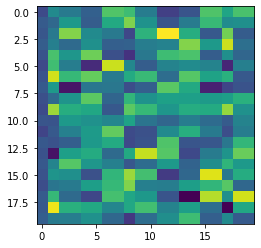

In [17]:
plt.imshow(ar)

In [18]:
wr = np.real(w)

In [19]:
wr

array([10.18790269,  1.60917895, -0.90253033, -0.90253033,  0.42475098,
        0.42475098,  0.18002731,  0.18002731, -0.84582129, -0.6128793 ,
       -0.6128793 , -0.57672857, -0.57672857,  0.82070704,  0.82070704,
       -0.12086619, -0.12086619,  0.09874221,  0.64241112,  0.64241112])

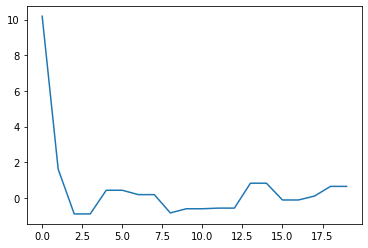

In [20]:
plt.plot(wr)

In [71]:
n = 10
x = np.random.rand(n)*2
x = np.sort(x)
A = np.random.rand(n,n)
A = 1/2*(A + A.transpose()) # make positive definite (ie. Hermitian)

In [76]:
def my_function(x, A):
    xt =np.transpose( x[None, ])
    
#     print(A.shape, xt.shape)
    return np.matmul(A,xt)

In [77]:
y = my_function(x,A)

In [78]:
A.shape, x.shape

((10, 10), (10,))

In [79]:
y

array([[5.43592484],
       [6.45528696],
       [5.02673946],
       [6.18209727],
       [6.63751484],
       [5.69771391],
       [5.97619406],
       [5.72608722],
       [5.65275561],
       [4.69865032]])

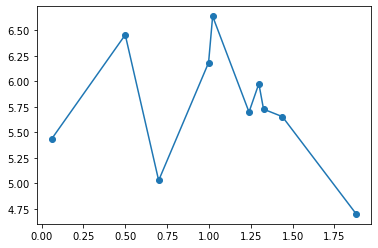

In [80]:

plt.plot(x,y)
plt.scatter(x,y)

In [81]:
w, a = LA.eig(A)
w

array([ 5.49236076, -1.04015395, -0.65254364, -0.34023842,  0.38595495,
        0.43022709, -0.20151359,  0.13790343,  0.07641547, -0.02089244])

In [99]:
# plt.imshow(a)
# plt.plot(w)
w = np.abs(w)
idx = np.flip( np.argsort(w)) # get ABS, arg sort it, then flip (largest 1st)
w = w[idx]
# the eigen vectos were columns, so select all the rows, and get the columns
a = a[:,idx]

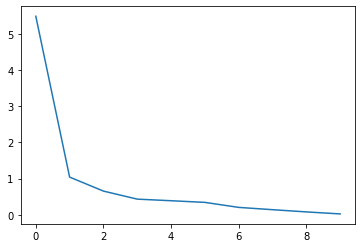

In [100]:
plt.plot(w)

Cut out some of the eigen vectors

In [101]:
a.shape
cut_fraction = 0.2
a_last = int(a.shape[0]- a.shape[0]*cut_fraction)
a_last

8

In [102]:
a2 = a[:, 0:a_last]

In [103]:
a2.shape

(10, 8)

In [106]:
my_output = LA.lstsq(a2,y, rcond=None)

In [107]:
my_output

(array([[18.11925635],
        [ 0.51886515],
        [-1.10605287],
        [-1.02539465],
        [-0.26026731],
        [-1.37450166],
        [-0.59231278],
        [ 0.60561457]]),
 array([0.23486679]),
 8,
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [108]:
xs = my_output[0]

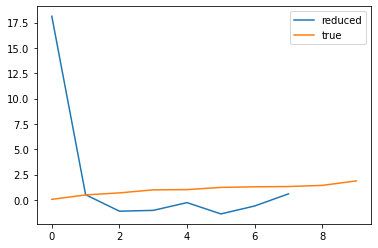

In [110]:
plt.plot(xs, label = 'reduced')
plt.plot(x, label = 'true')

plt.legend()